# Question 6
Consider a general driven system with time-dependent Hamiltonian $\hat{H}(t)$. The evolution operator over the time interval $[t_i,t_f]$ is given by

$$ \hat{U}(t_f,t_i) = \overleftarrow{\rm T}\exp \left[ \frac{1}{{\rm i}\hbar}\int_{t_i}^{t_f}{\rm d}t \hat{H}(t)\right].$$

For numerical purposes, the Schrödinger-picture time evolution between two neighbouring grid points is

$$|\psi(t_{n+1})\rangle = \hat{U}(t_{n+1},t_n)|\psi(t_n)\rangle,$$

where $t_n = n\Delta t$. If $\Delta t$ is small enough that the Hamiltonian can be approximated as constant between $t_n$ and $t_{n+1}$, convince yourself that

$$ \hat{U}(t_{n+1},t_n) \approx {\rm e}^{-{\rm i}\Delta t\hat{H}(t_n)/\hbar}. $$

Now specialise to a driven qubit with Hamiltonian

$$\hat{H}(t) = \tfrac{1}{2}\hbar \omega_0 \hat{\sigma}_z  + \hbar \Omega \sin(\omega_{\rm d}t)\hat{\sigma}_x.$$

Compute the time evolution of the state in the Schrödinger picture numerically using the above approximation for $\hat{U}(t_{n+1},t_n)$. Consider the evolution up to time $t=100\omega_0^{-1}$, for a near-resonant drive, $\omega_{\rm d} = 0.99\omega_0$, and Rabi frequency $\Omega = 0.1\omega_0$. Choose the initial state to be $|\psi(0)\rangle = |\downarrow\rangle$ and the timestep to be $\Delta t=0.05\omega_0^{-1}$. Plot the expectation values of the three Pauli operators as a function of dimensionless time $\omega_0 t$ and compare your predictions to those of the rotating-wave approximation. Repeat the comparison for $\Omega = \omega_0$. Comment briefly on the validity of the rotating-wave approximation in each case. (Hint: you are always free to work in a convenient unit system, e.g. by choosing units of time such that $\omega_0=1$.)

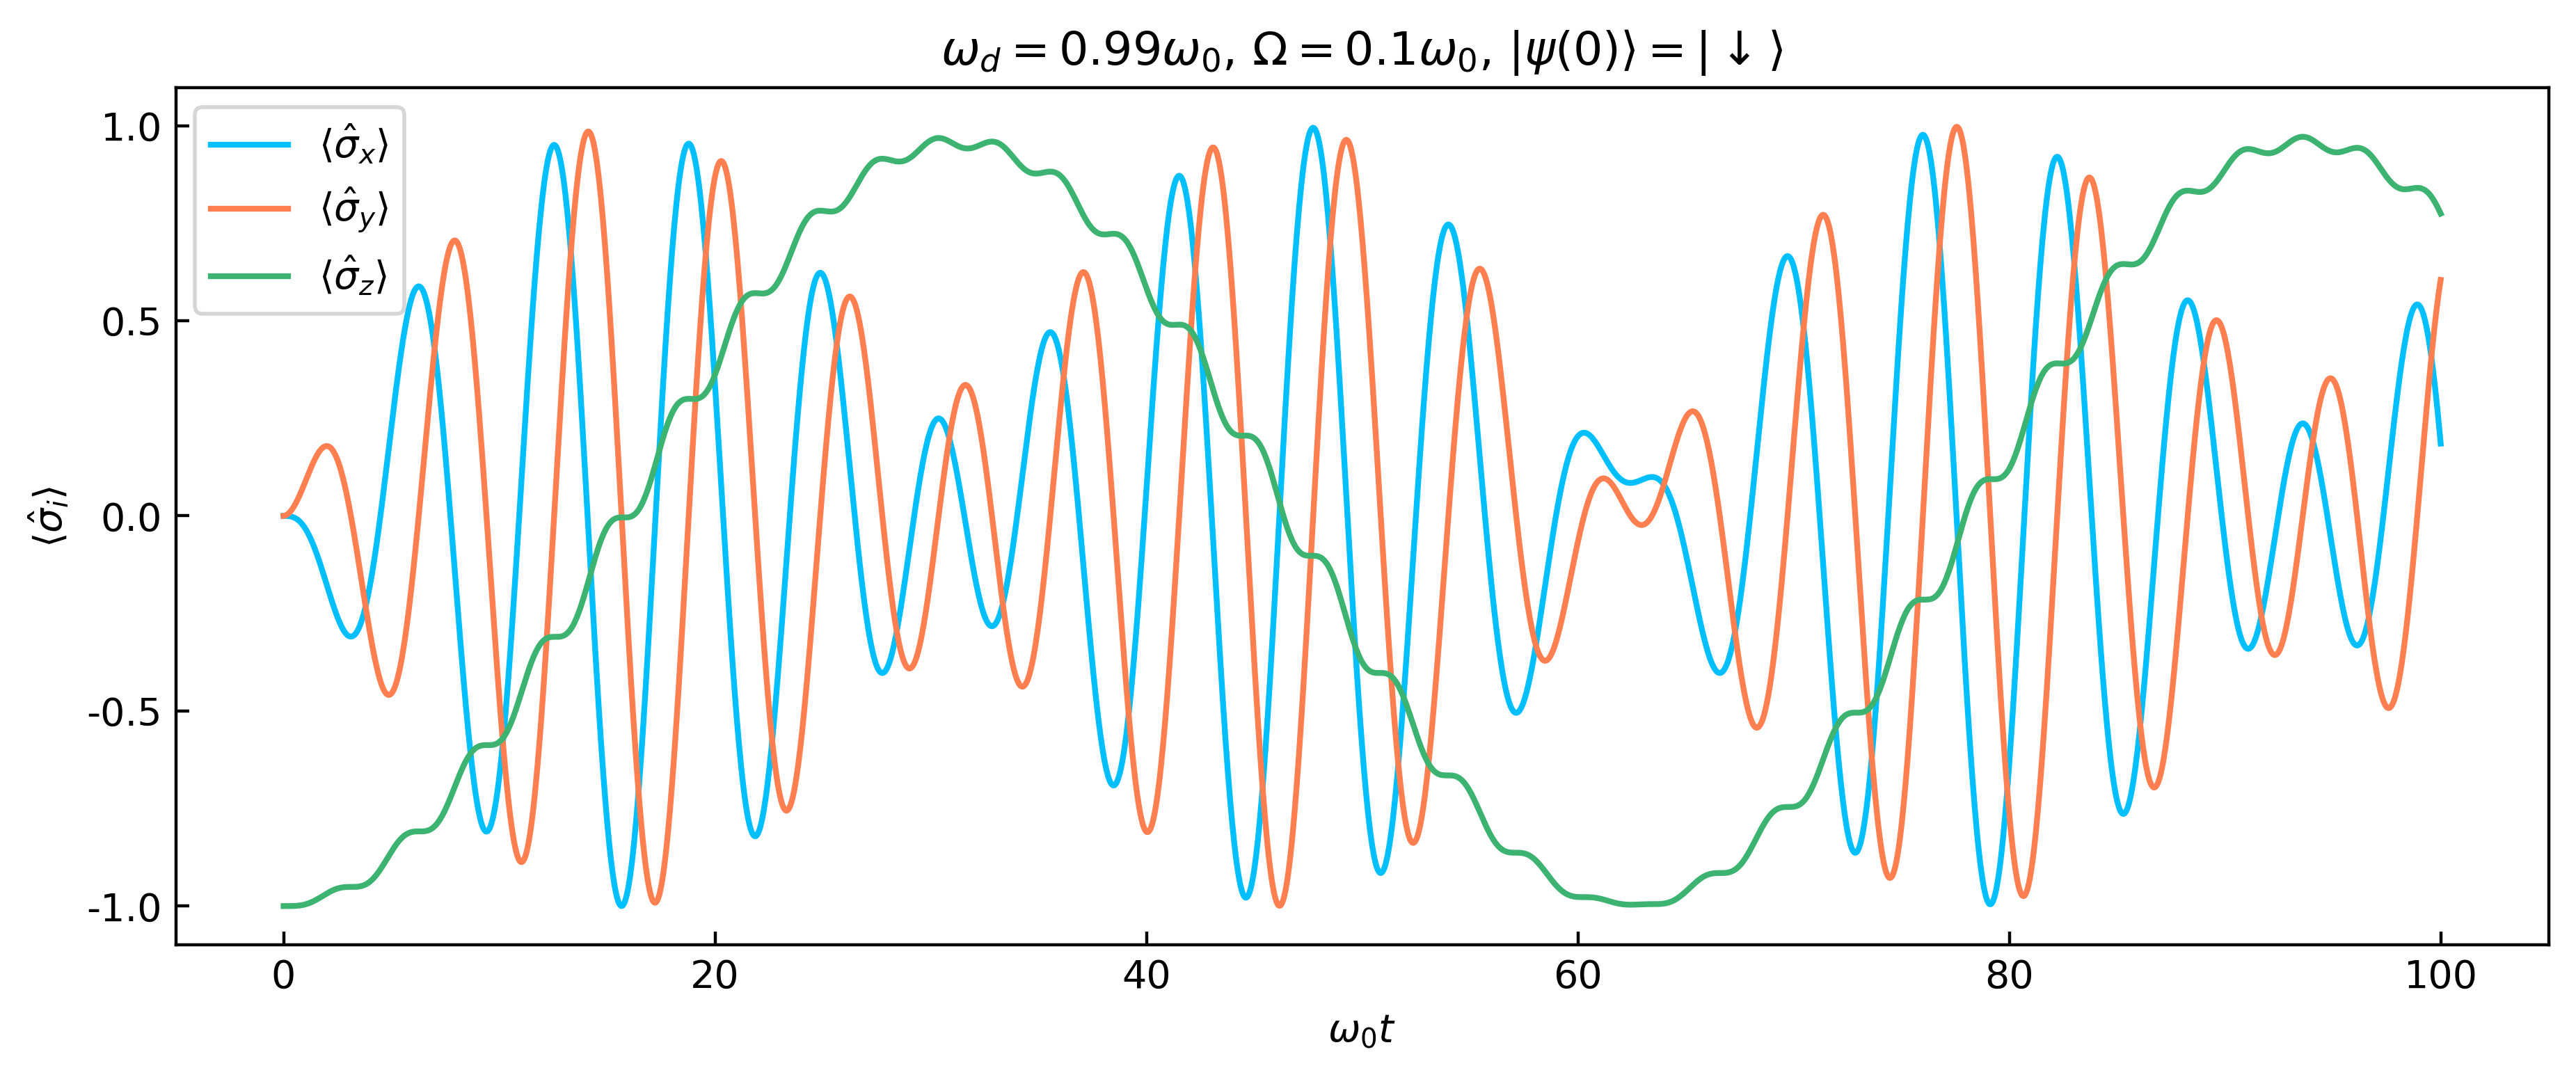

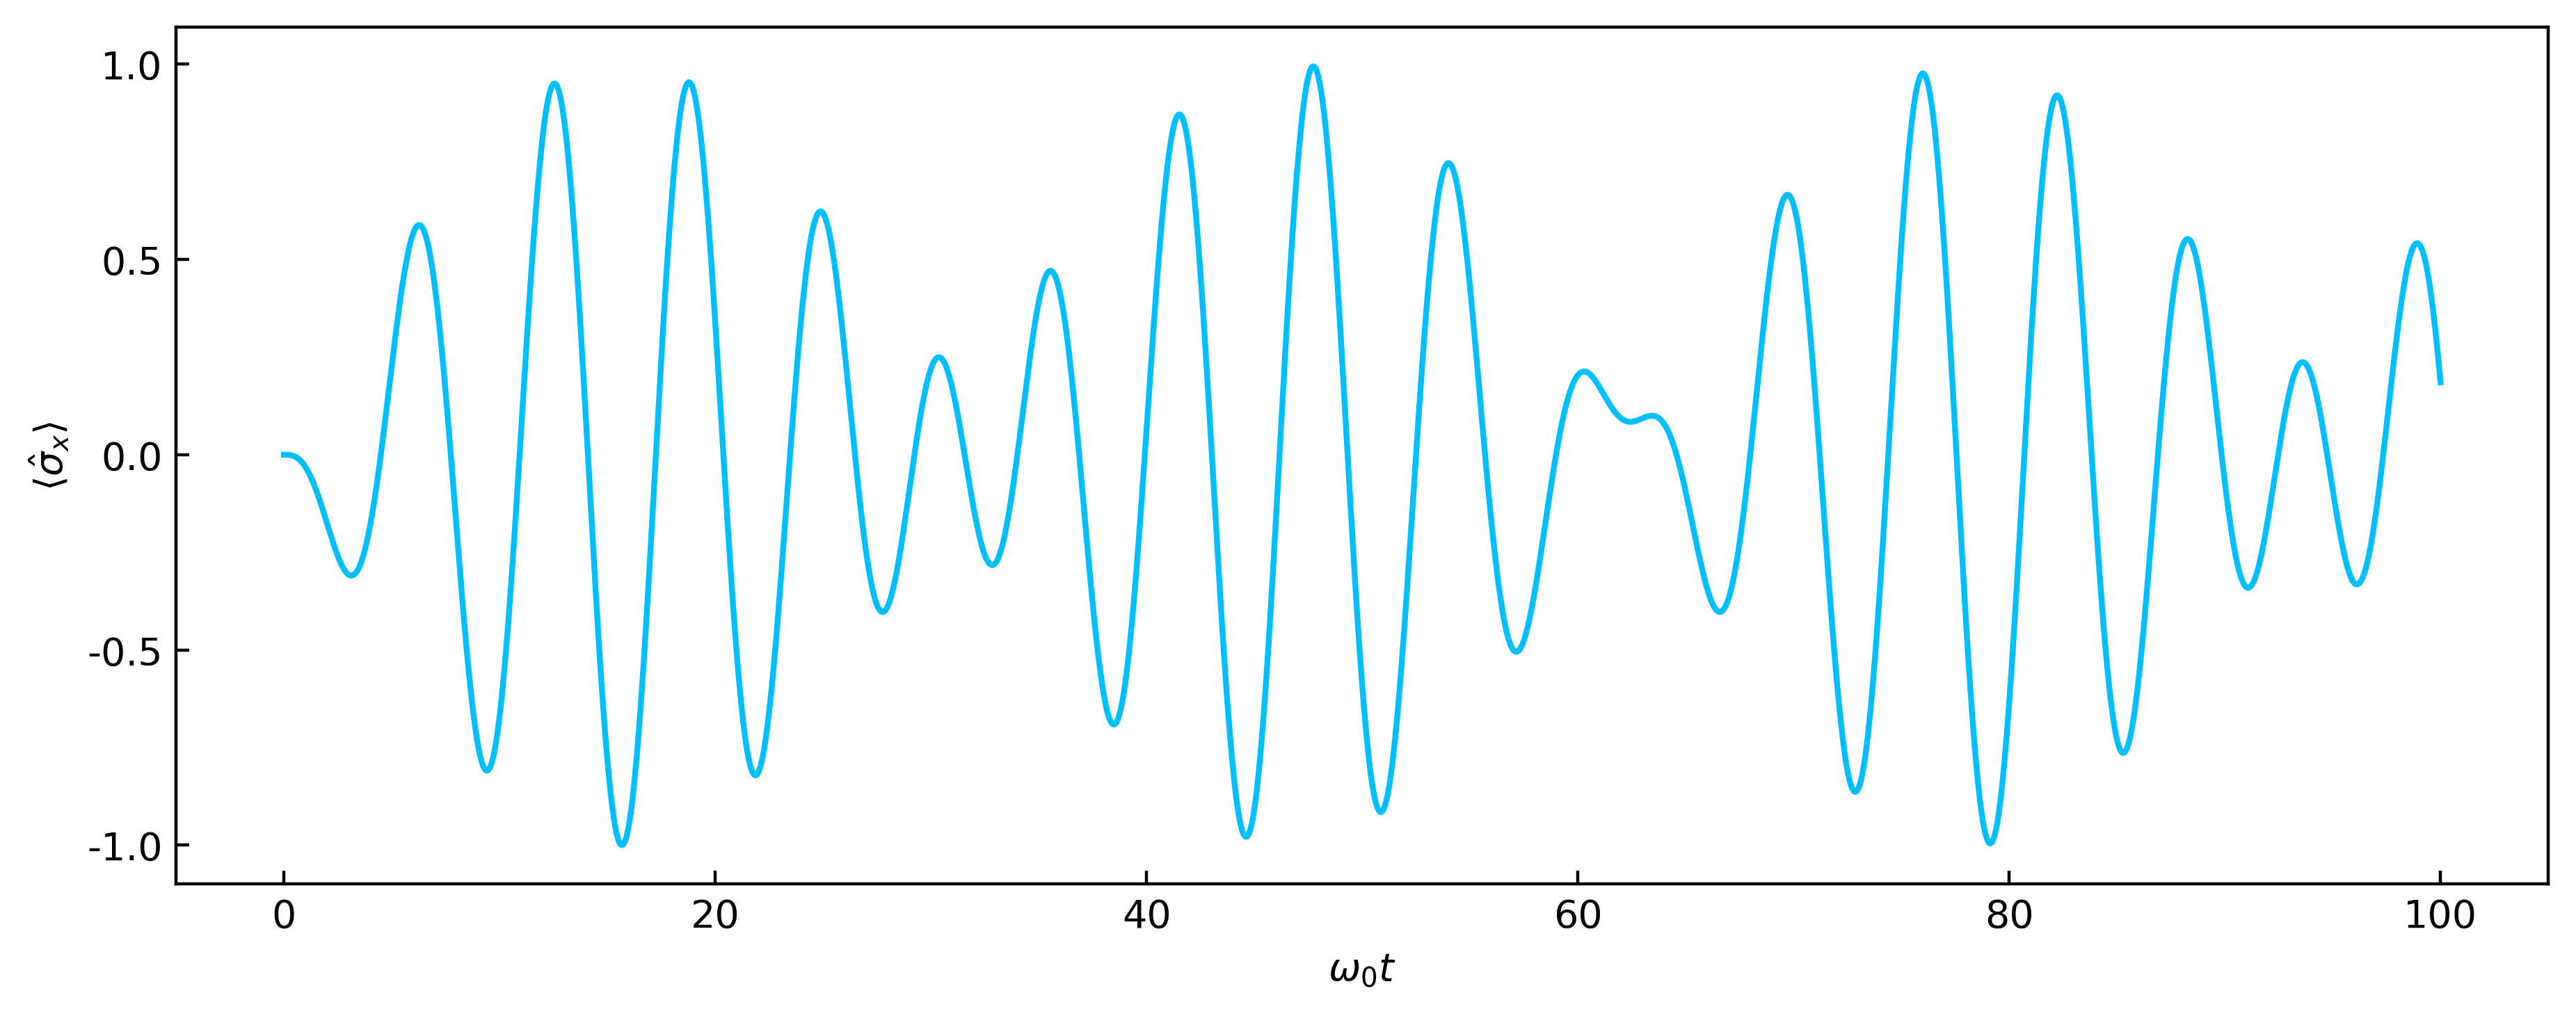

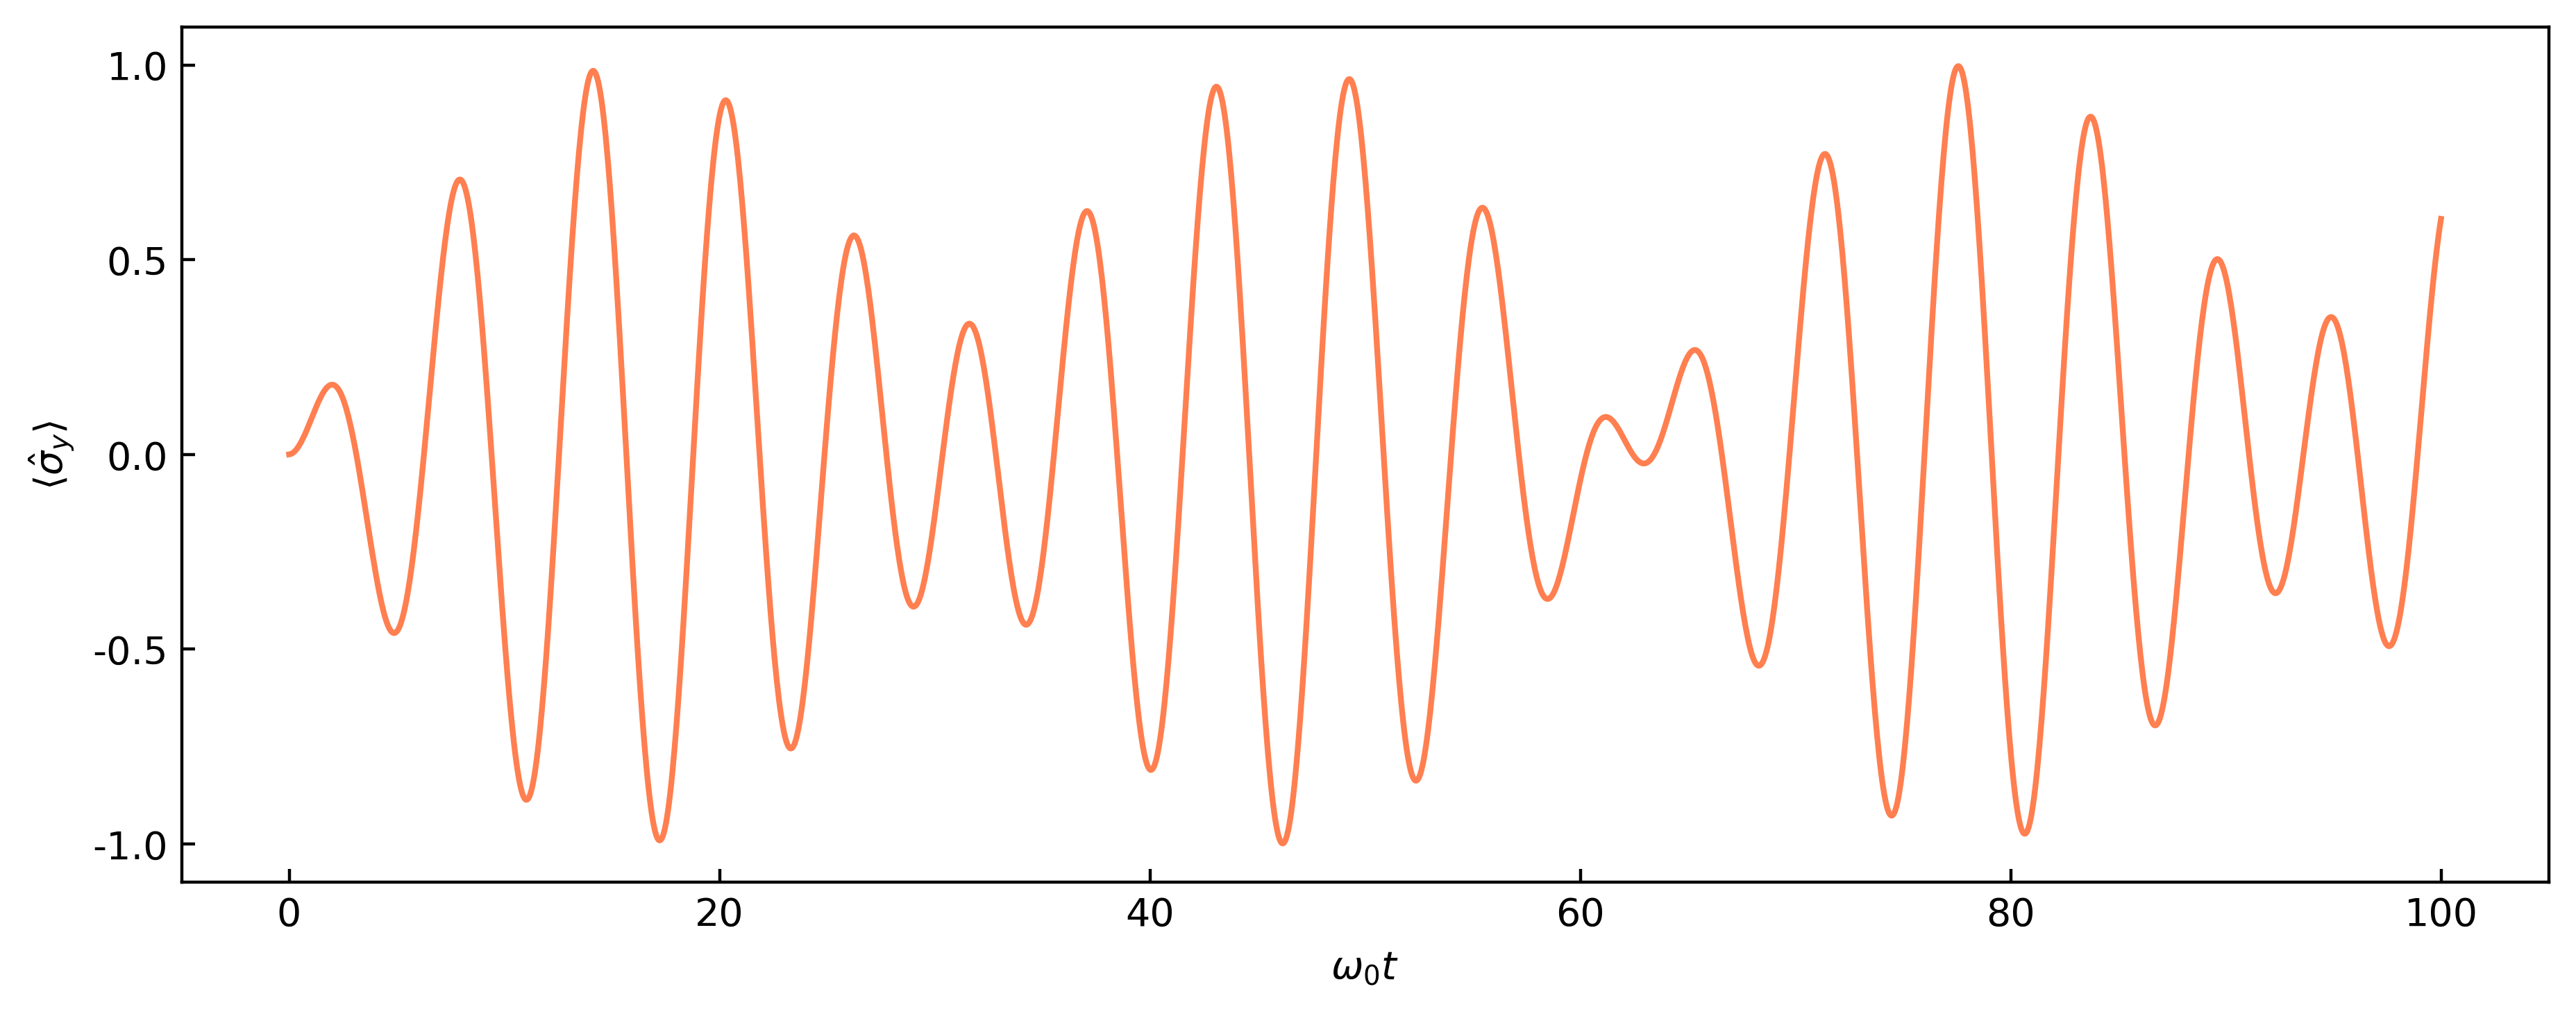

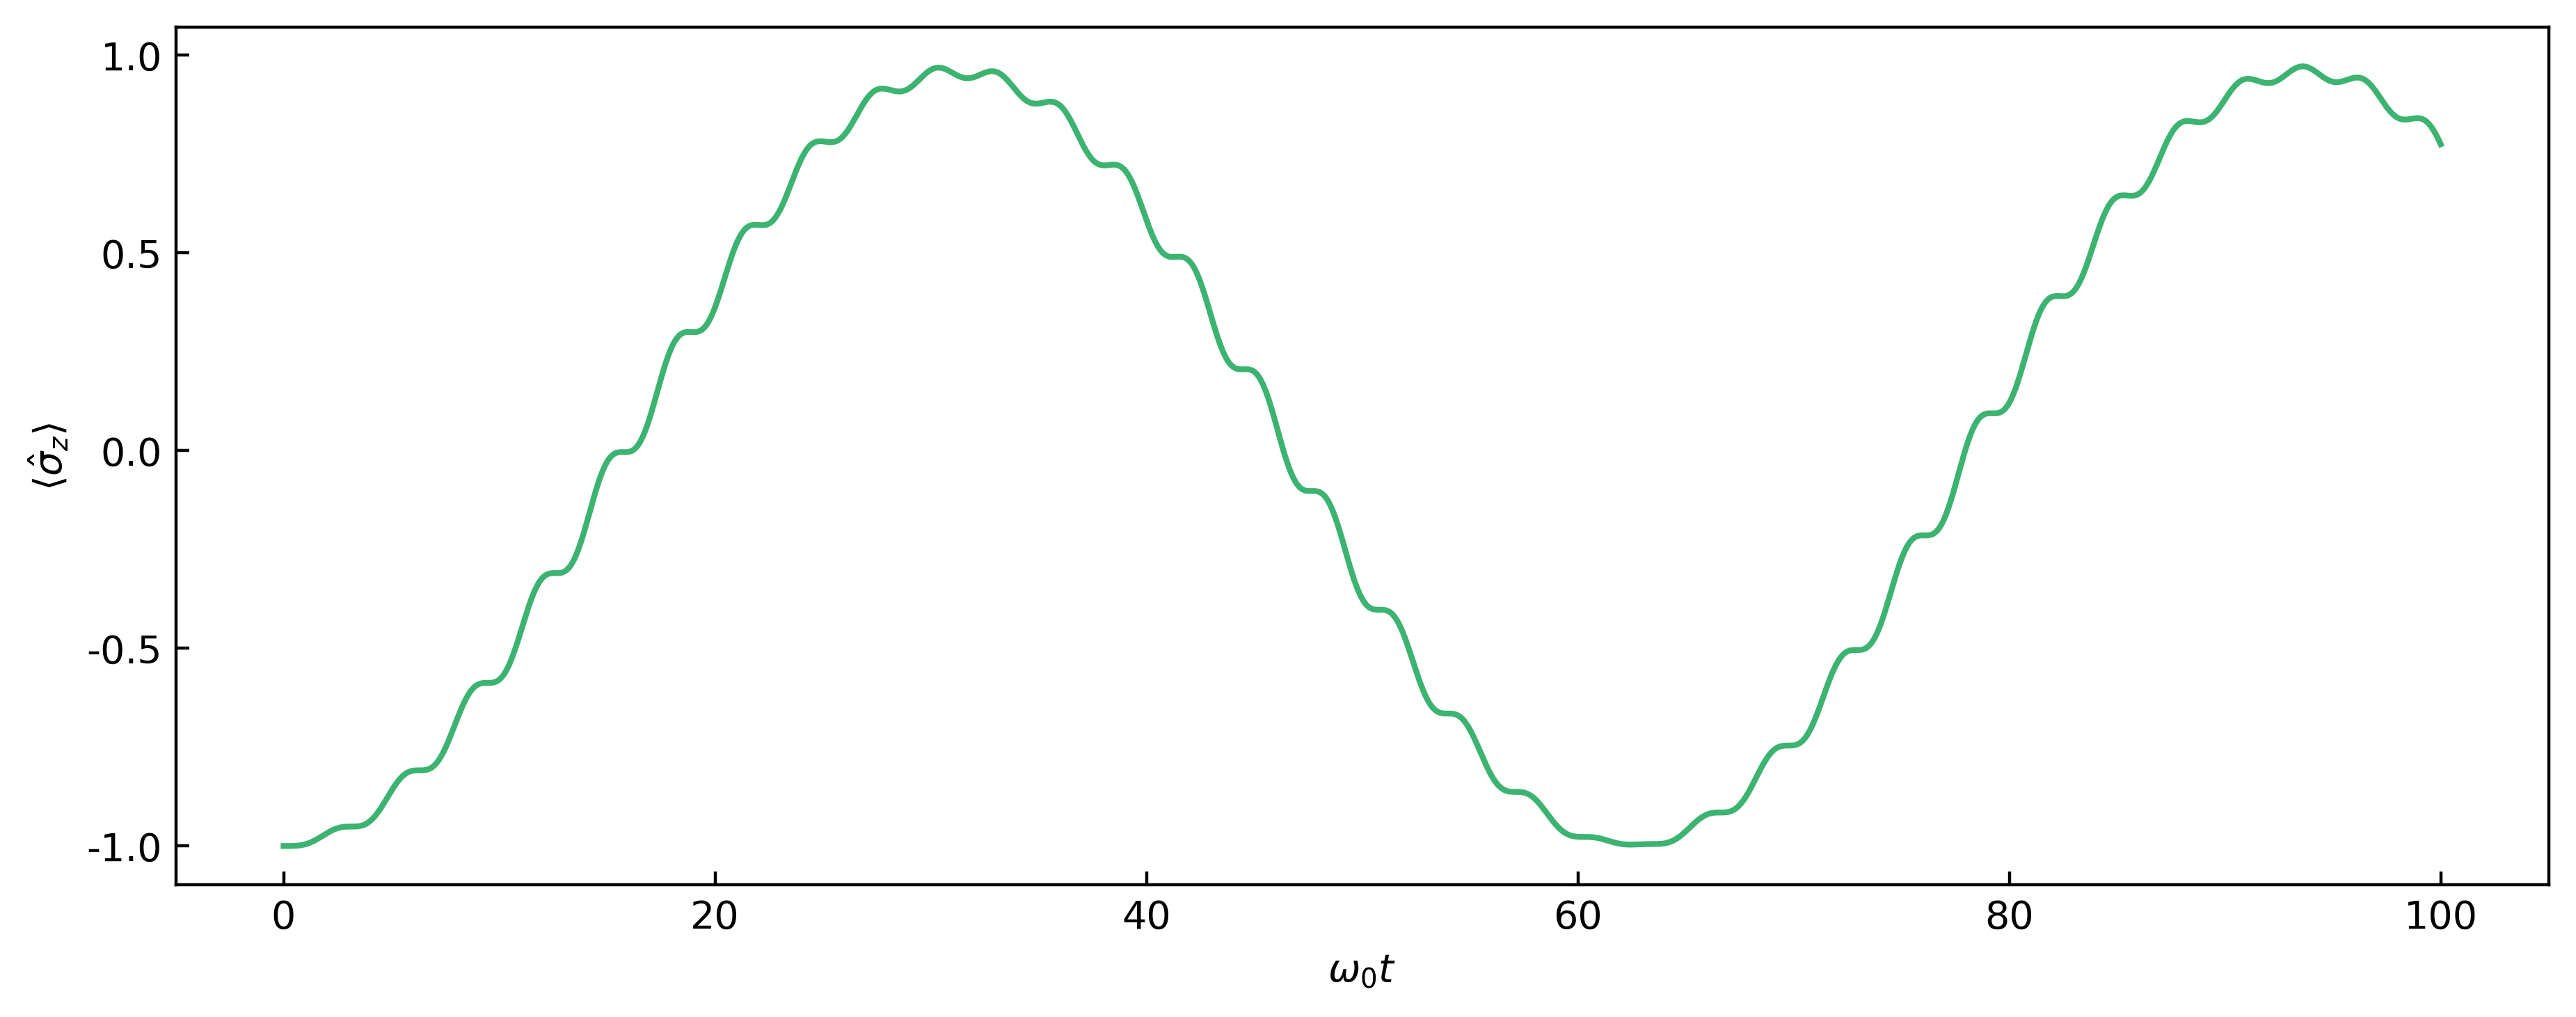

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.linalg import expm
#define values
w0 = 1
t_f = 100/w0
dt = 0.05/w0
N = int(t_f/dt) #amount of values to discretize from 0 to t=100/w0 with dt 0.05/w0
t = np.linspace(0, t_f, N)
wd = 0.99*w0
omega = 0.1*w0
initial_state = np.array([[0],
                         [1]])
#define pauli matrices and identity matrix
sig_X = np.array([[0, 1], [1, 0]])
sig_Y = np.array([[0, -1j], [1j, 0]])
sig_Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])

def Hamiltonian(time):
    return w0/2  * sig_Z  + omega * np.sin(wd*time) * sig_X

#evolution operator
def unitary_evolution(time ,vector):
    return expm(-1j * dt * Hamiltonian(time)) @ vector
#expectation value
def expectation_value(state, operator):
    expect = state.T.conjugate() @ operator @ state
    return float(expect.real)

state = initial_state
all_states = []

for i in range(N):
    state = unitary_evolution(t[i], state)
    all_states.append(np.array([[expectation_value(state, sig_X)],
                                [expectation_value(state, sig_Y)],
                                [expectation_value(state, sig_Z)]])) #the expectation values are stored as a vector for every time

#plot of all the expectation values together
plt.figure(figsize=(11,4),dpi=400)
plt.plot(t, [all_states[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle$', c='deepskyblue')
plt.plot(t, [all_states[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle$', c='coral')
plt.plot(t, [all_states[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle$', c='mediumseagreen')

plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_i\rangle$')
plt.tick_params(axis="both", direction="in")
plt.legend()
plt.title(r'$\omega_d=0.99\omega_0$, $\Omega=0.1\omega_0$, $|\psi(0)\rangle = |\downarrow\rangle$')
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])

plt.show()

#plot expecation values separately
plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [all_states[i][0][0] for i in range(N)], c='deepskyblue')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_x\rangle$')
plt.tick_params(axis="both", direction="in")
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
plt.show()

plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [all_states[i][1][0] for i in range(N)], c='coral')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_y\rangle$')
plt.tick_params(axis="both", direction="in")
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
plt.show()

plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [all_states[i][2][0] for i in range(N)], c='mediumseagreen')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_z\rangle$')
plt.tick_params(axis="both", direction="in")
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
plt.show()





As it has been seen in class, the solution for the given $\hat{H}(t)$ under the rotating wave approximation is:

$$ \hat{H}_I = \frac{\hbar}{2}\left((\omega_0-\omega_d)\hat{\sigma}_z - \Omega\hat{\sigma}_y \right)$$

The approximation should be correct as long as the frequency of the driving field $\omega_d$ is near ressonance with the system transition's $\omega_0$ ($\omega_d\sim\omega_0$) and the coupling is weak ($\Omega\ll\omega_0$).

The values obtained with the RWA derivation are shown in the following plot. The expectation value of the operator describing the population of the ground and excited states ($\langle\hat{\sigma}_z\rangle$) is very similar in the analytical expression under the RWA and the numerical calculation performed in the previous cell of code.

The values obtained with the RWA derivation are shown in the following plot. The expectation value of the operator describing the population of the ground and excited states ($\langle\hat{\sigma}_z\rangle$) is very similar in the analytical expression under the RWA and the numerical calculation performed in the previous cell of code.

#### Resource to better understand this (for me at least)
[https://en.wikipedia.org/wiki/Rotating-wave_approximation](https://en.wikipedia.org/wiki/Rotating-wave_approximation)

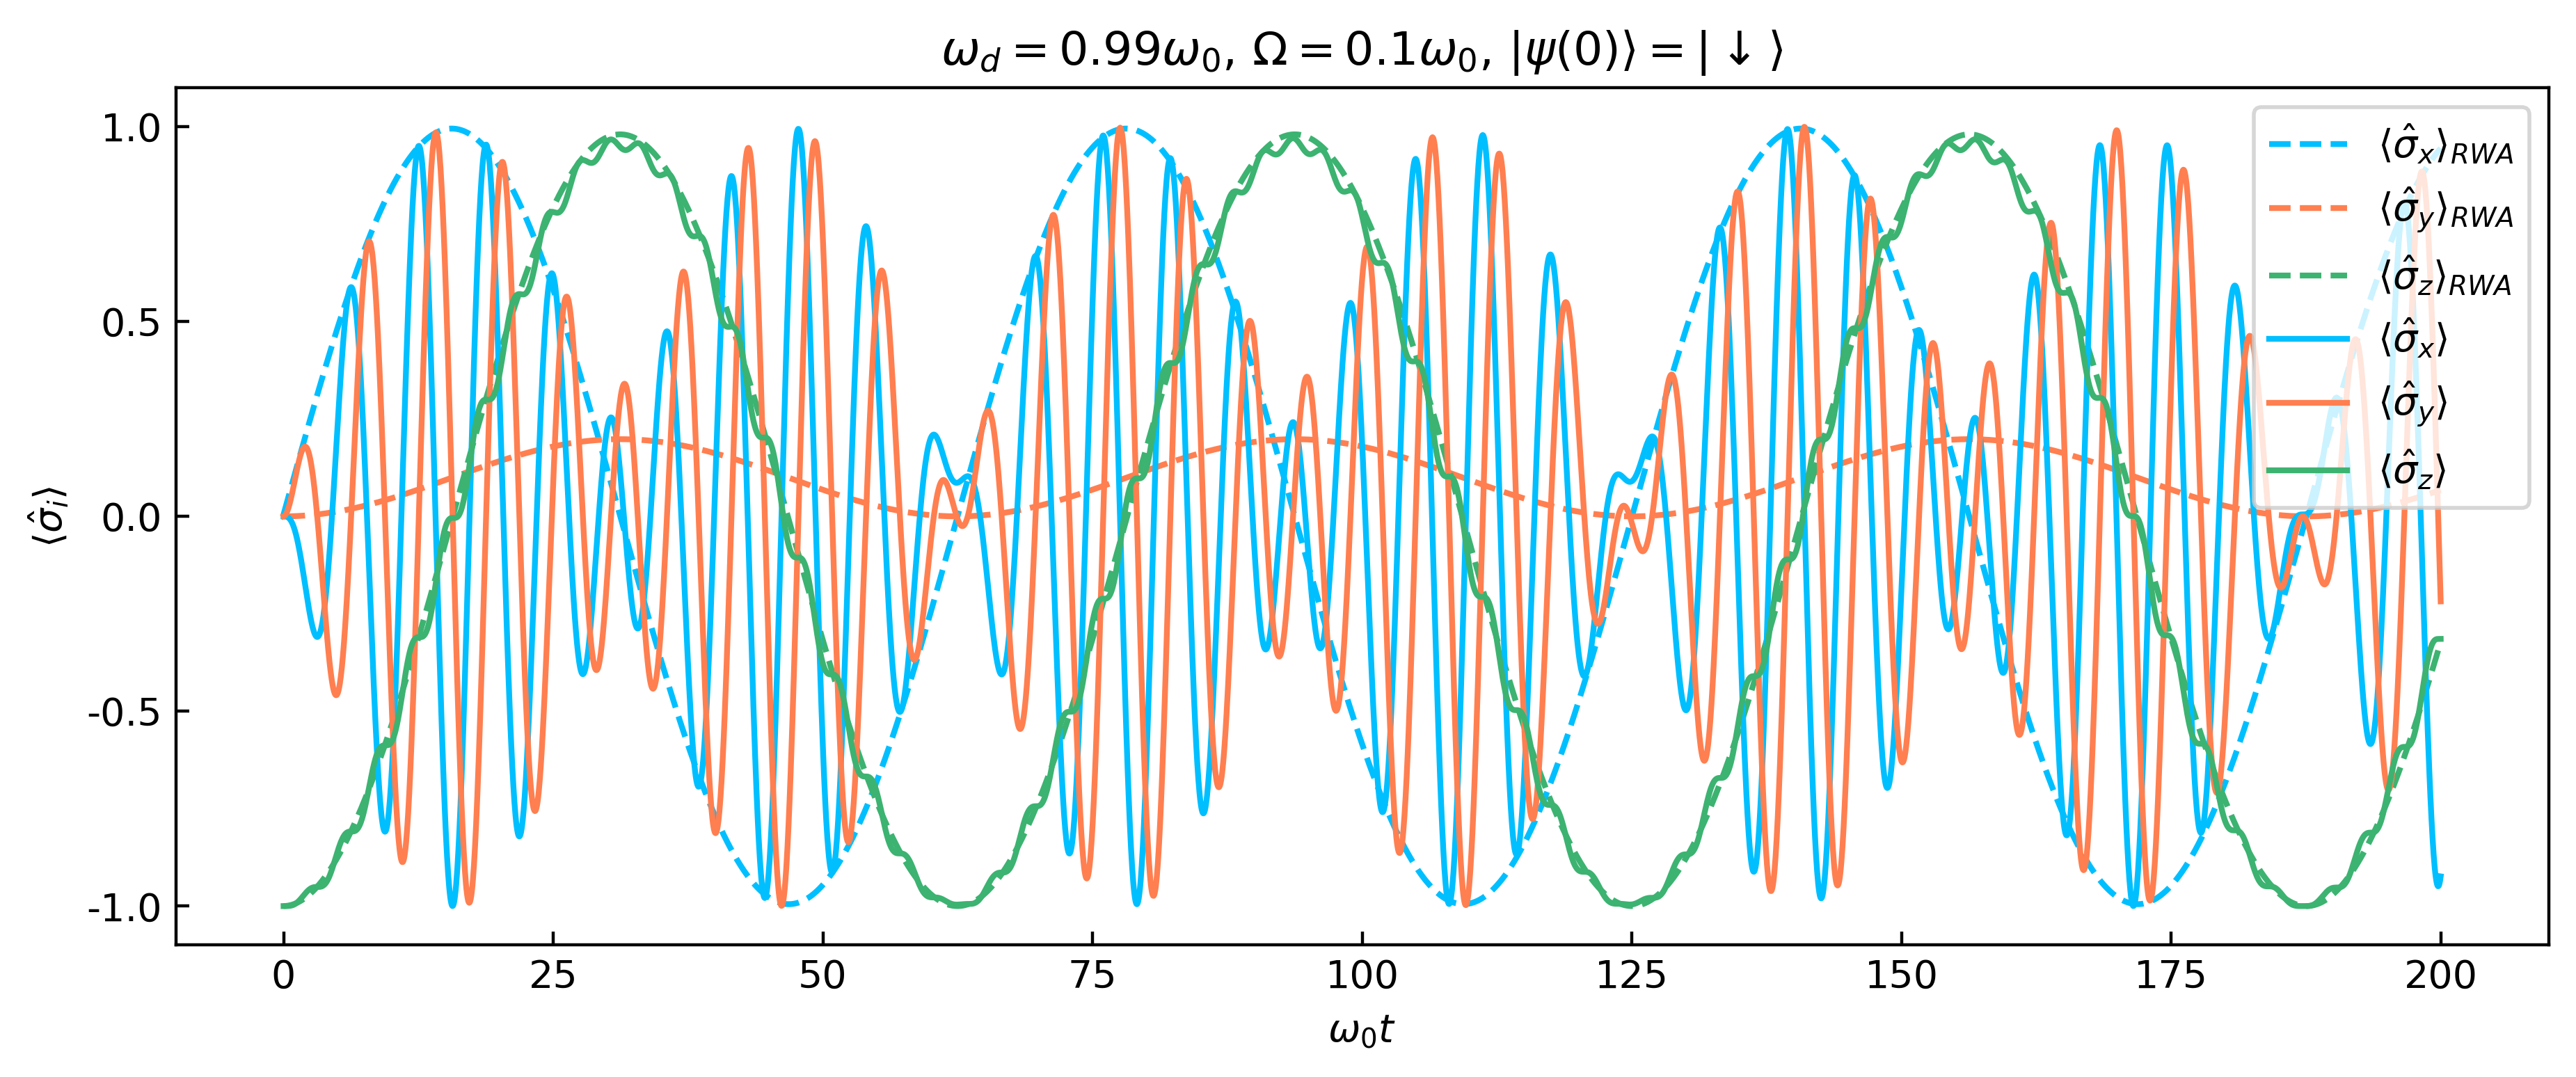

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

w0 = 1
t_f = 200/w0 #final value
dt = 0.05/w0 # separation
N = int(t_f/dt)
t = np.linspace(0, t_f, N)
wd = 0.99 * w0
omega = 0.1*w0
initial_state = np.array([[0],
                          [1]])

#pauli matrices and identity
sig_X = np.array([[0, 1], [1, 0]])
sig_Y = np.array([[0, -1j], [1j, 0]])
sig_Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])
#The approximation should be correct as long as the frequency of the driving field is near ressonance with the system transition's and the coupling is weak hamiltonian
def H(time):
    return w0/2 * sig_Z + omega * np.sin(wd*time) * sig_X
def H_rwa(time):
    #defined in the provided equation
    return (w0-wd)/2 * sig_Z - omega/2 * sig_Y
def unitary_evolution(time, vector, is_rwa):
    #defined from the equation above (or estimate)
    #help graph both the original and under rwa
    if is_rwa:
        return expm(-1j * dt * H_rwa(time)) @ vector
    else:
        return expm(-1j * dt * H(time)) @ vector
    
def expectation_value(state, operator):
    expect = state.T.conjugate() @ operator @ state
    return float(expect.real)

#state is a variable that will change at all time t
state = initial_state
all_states_rwa = []
for i in range(N):
    state =  unitary_evolution(t[i], state, True)
    all_states_rwa.append(np.array([[expectation_value(state, sig_X)],
                                [expectation_value(state, sig_Y)],
                                [expectation_value(state, sig_Z)]])) #the expectation values are stored as a vector for every time
#gran the original stuff need to reset to it doesnt use the unitary evolution
state = initial_state
all_states = []
for i in range(N):
    state = unitary_evolution(t[i], state, False)
    all_states.append(np.array([[expectation_value(state, sig_X)],
                                [expectation_value(state, sig_Y)],
                                [expectation_value(state, sig_Z)]])) 

#plot of all the expectation values together
plt.figure(figsize = (11,4), dpi=400)
#plots under RWA
plt.plot(t, [all_states_rwa[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle_{RWA}$', c='deepskyblue', ls ='--')
plt.plot(t, [all_states_rwa[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle_{RWA}$', c='coral', ls ='--')
plt.plot(t, [all_states_rwa[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle_{RWA}$', c='mediumseagreen', ls ='--')
#plots without RWA
plt.plot(t, [all_states[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle$', c='deepskyblue')
plt.plot(t, [all_states[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle$', c='coral')
plt.plot(t, [all_states[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle$', c='mediumseagreen')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_i\rangle$')
plt.tick_params(axis="both", direction="in")
plt.legend()
plt.title(r'$\omega_d=0.99\omega_0$, $\Omega=0.1\omega_0$, $|\psi(0)\rangle = |\downarrow\rangle$')
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
#plt.savefig('6irwa.pdf', dpi=400)

plt.show()


repeating the plot if $\Omega = \omega_0$

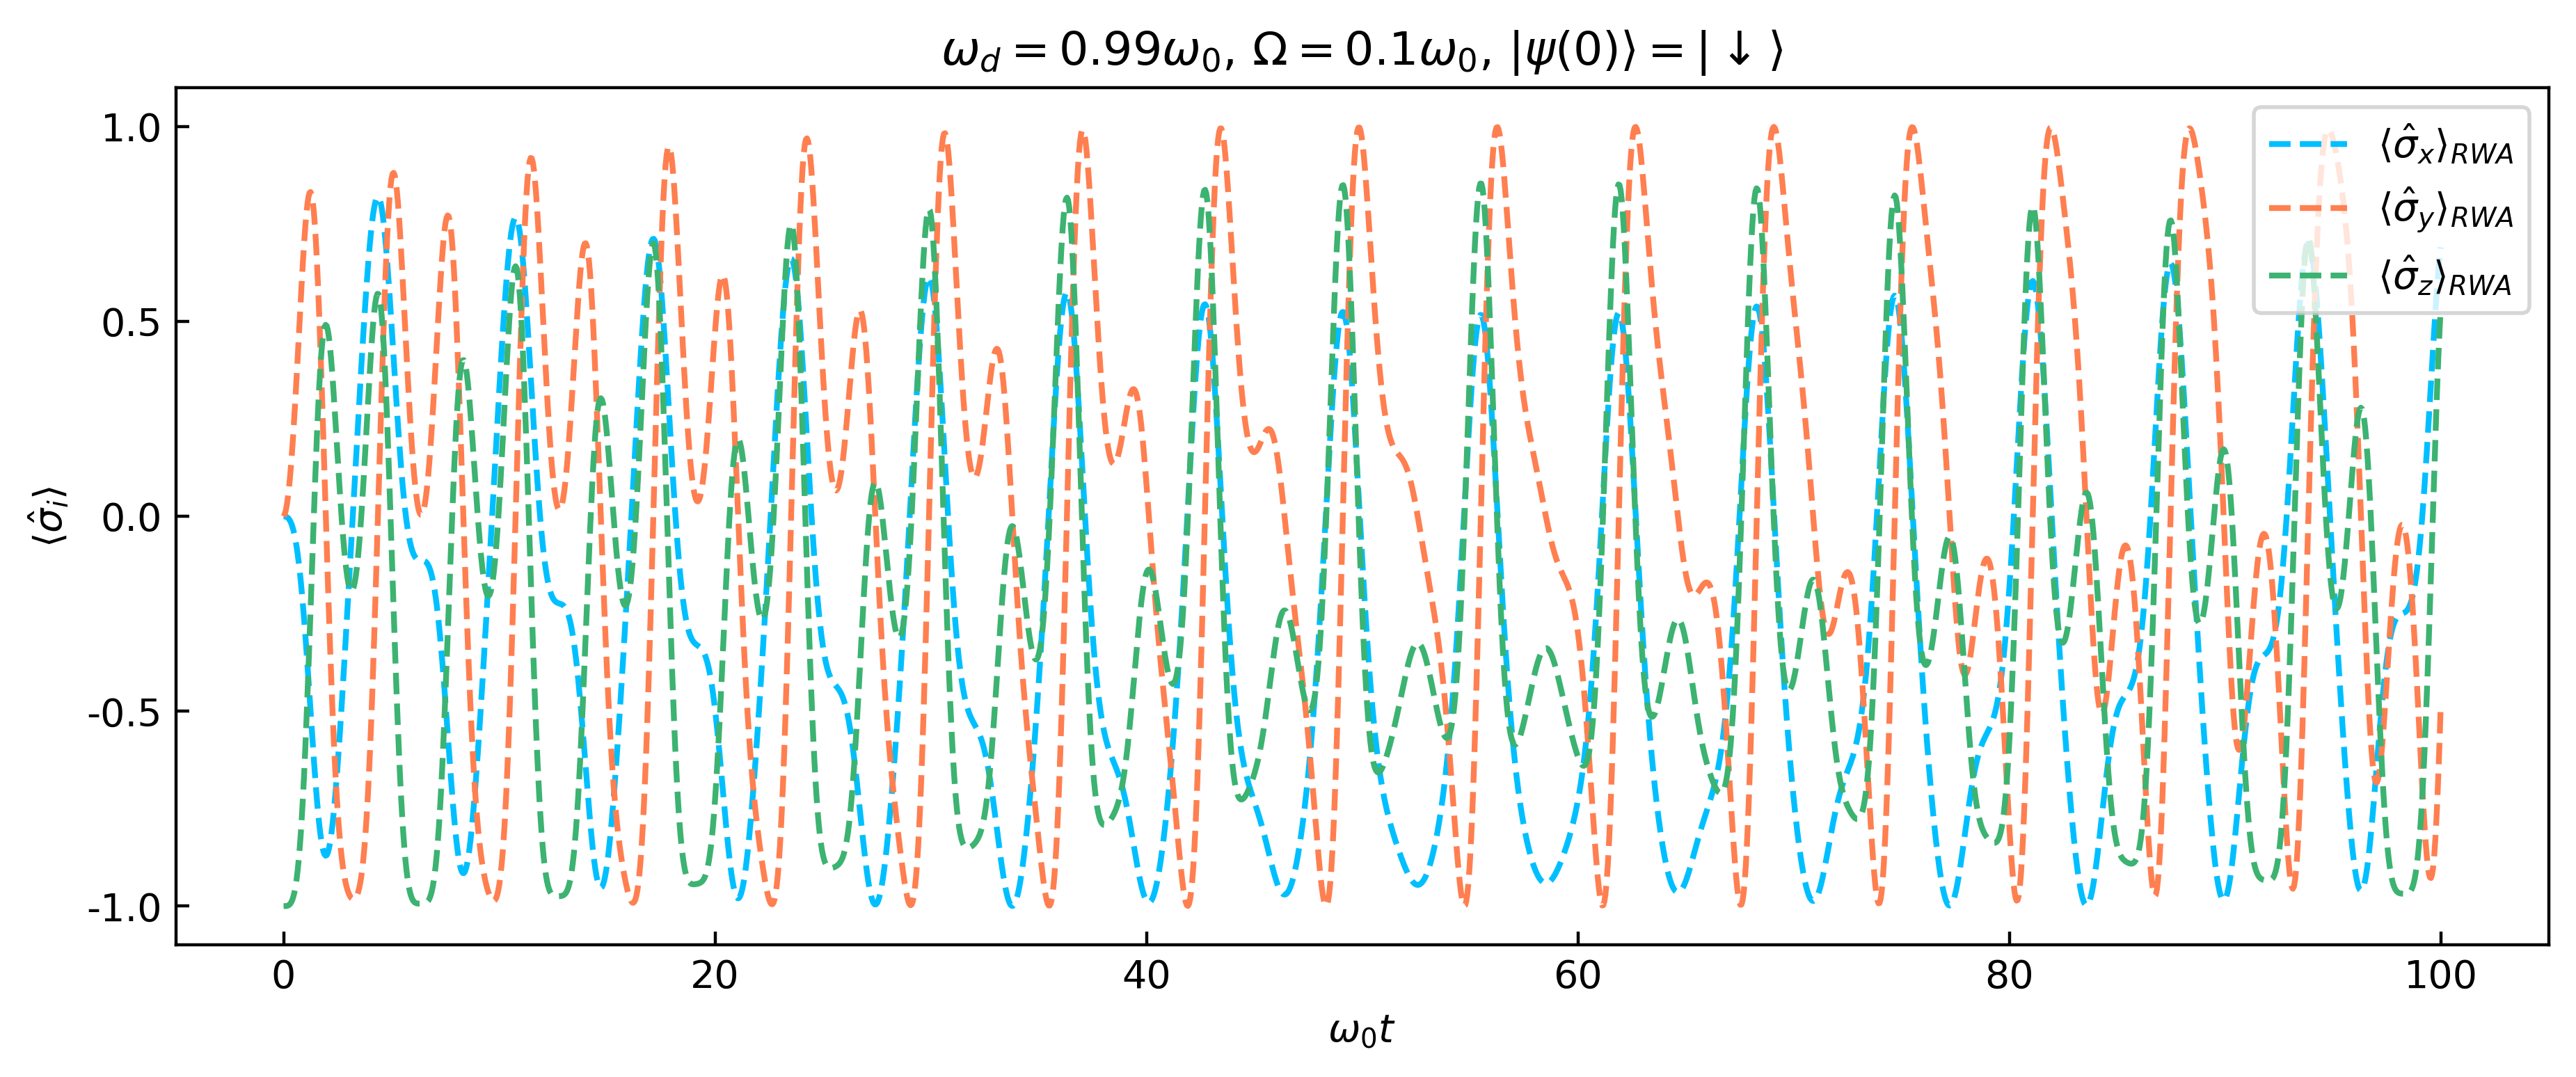

In [23]:
#repeat if w0 = omega
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

w0 = 1
t_f = 100/w0 #final value
dt = 0.05/w0 # separation
N = int(t_f/dt)
t = np.linspace(0, t_f, N)
wd = 0.99 * w0
omega = w0
initial_state = np.array([[0],
                          [1]])

#pauli matrices and identity
sig_X = np.array([[0, 1], [1, 0]])
sig_Y = np.array([[0, -1j], [1j, 0]])
sig_Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])
#The approximation should be correct as long as the frequency of the driving field is near ressonance with the system transition's and the coupling is weak hamiltonian
def H(time):
    #defined in the provided equation
    #return (w0-wd)/2 * sig_Z - omega/2 * sig_Y
    #need to change the equation approximation because the coupling is weak.
    return w0/2 * sig_Z + omega * np.sin(wd*time) * sig_X
def unitary_evolution(time, vector):
    #defined from the equation above (or estimate)
    return expm(-1j * dt * H(time)) @ vector
def expectation_value(state, operator):
    expect = state.T.conjugate() @ operator @ state
    return float(expect.real)

#state is a variable that will change at all time t
state = initial_state
all_states_rwa = []

for i in range(N):
    state =  unitary_evolution(t[i], state)
    all_states_rwa.append(np.array([[expectation_value(state, sig_X)],
                                [expectation_value(state, sig_Y)],
                                [expectation_value(state, sig_Z)]])) #the expectation values are stored as a vector for every time
    

#plot of all the expectation values together
plt.figure(figsize = (11,4), dpi=400)
#plots under RWA
plt.plot(t, [all_states_rwa[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle_{RWA}$', c='deepskyblue', ls ='--')
plt.plot(t, [all_states_rwa[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle_{RWA}$', c='coral', ls ='--')
plt.plot(t, [all_states_rwa[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle_{RWA}$', c='mediumseagreen', ls ='--')
# #plots without RWA
# plt.plot(t, [all_states[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle$', c='deepskyblue')
# plt.plot(t, [all_states[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle$', c='coral')
# plt.plot(t, [all_states[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle$', c='mediumseagreen')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_i\rangle$')
plt.tick_params(axis="both", direction="in")
plt.legend()
plt.title(r'$\omega_d=0.99\omega_0$, $\Omega=0.1\omega_0$, $|\psi(0)\rangle = |\downarrow\rangle$')
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
#plt.savefig('6irwa.pdf', dpi=400)

plt.show()

Compare to the original, when the rabi frequency equals the qubit frequency.

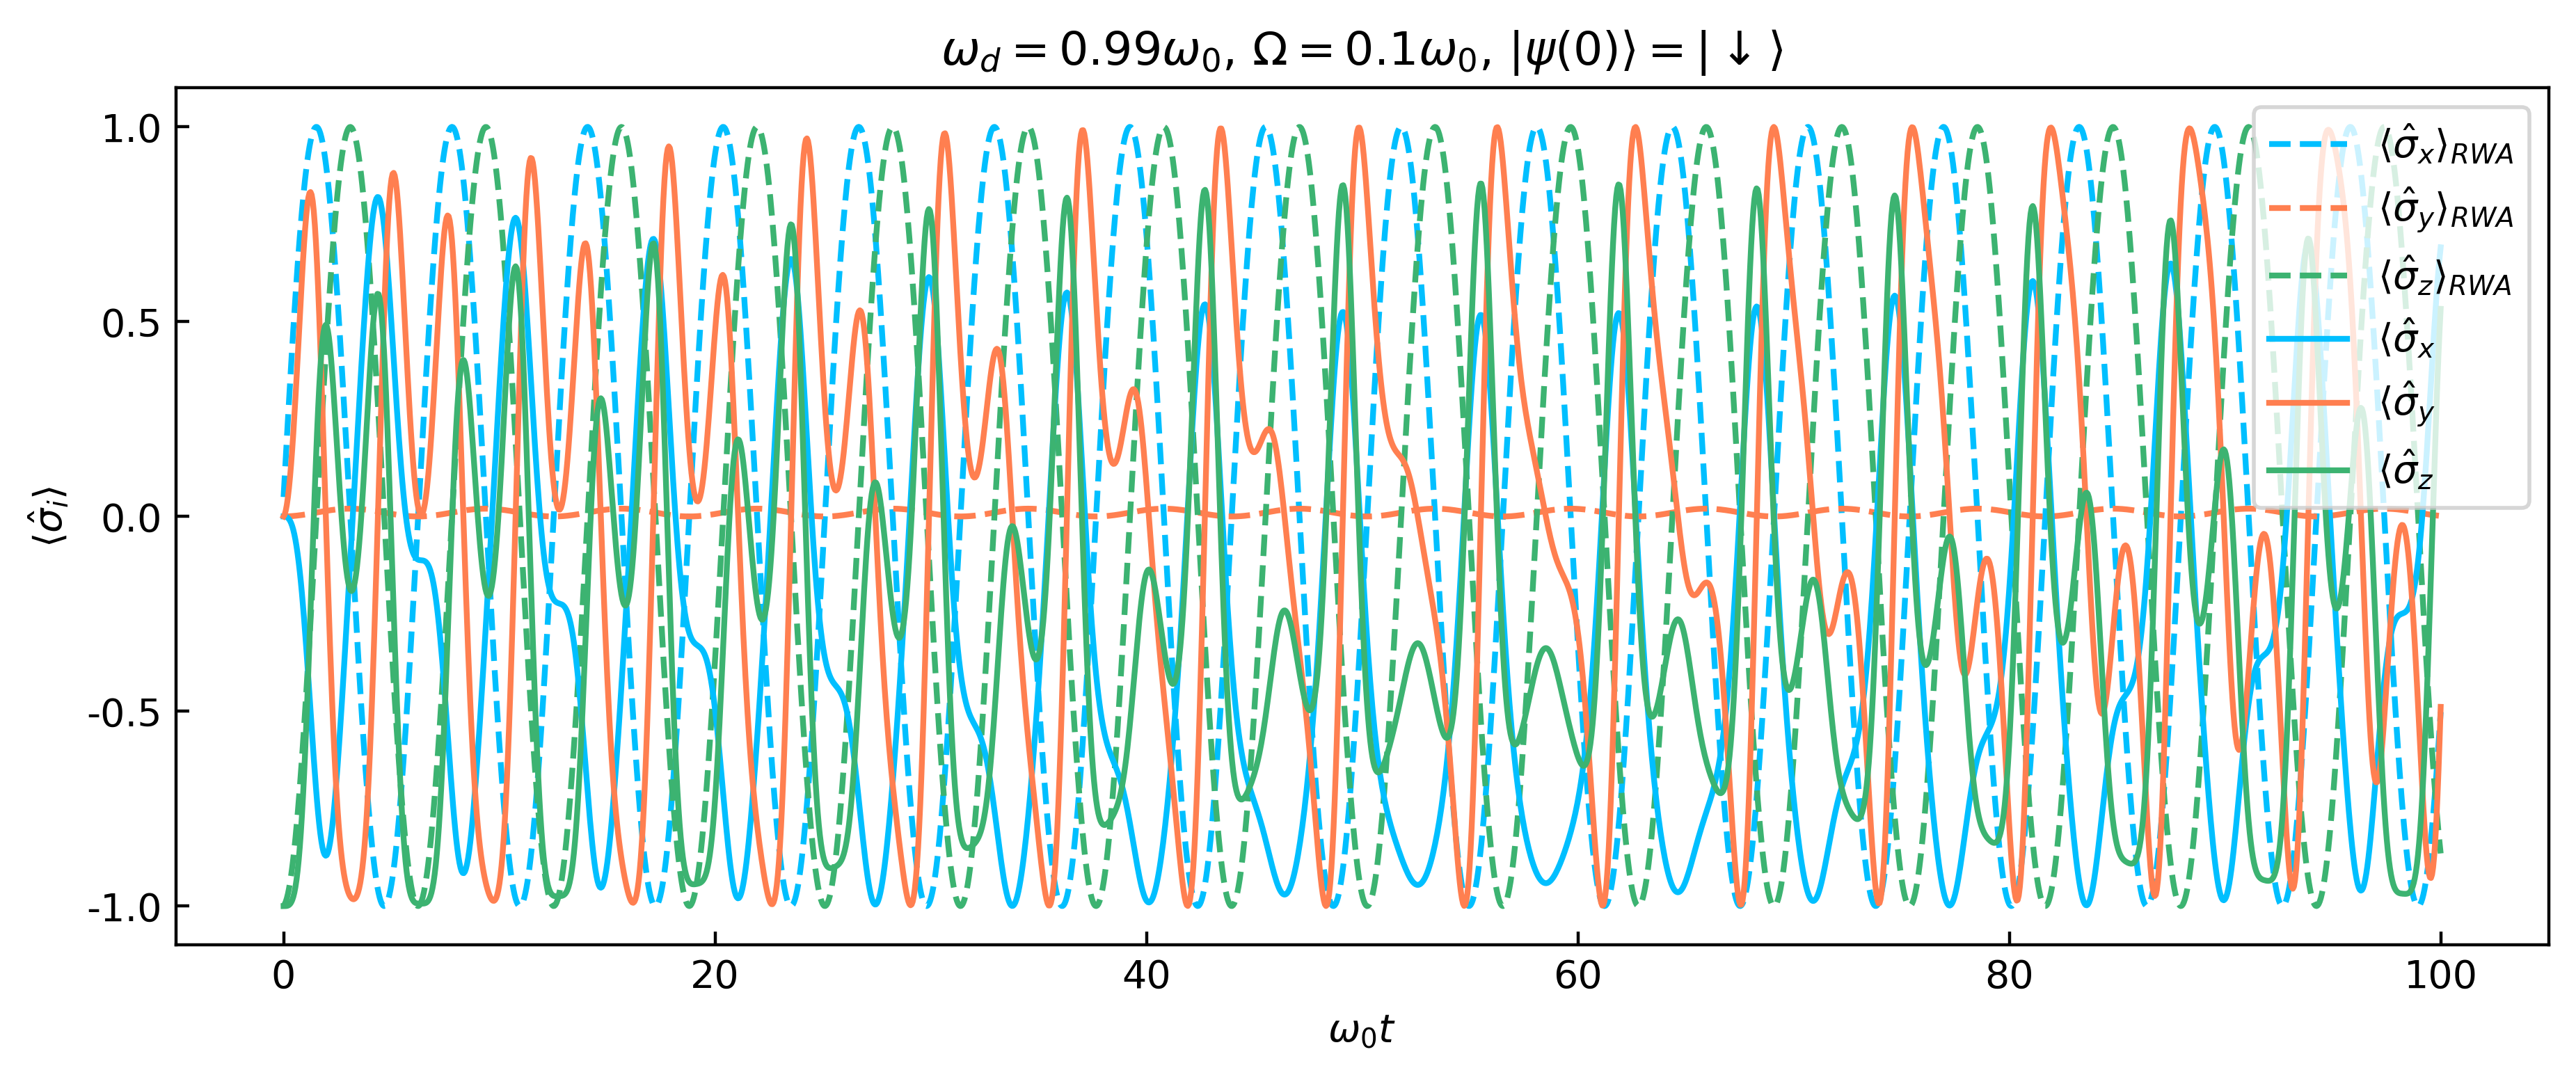

In [28]:
#repeat if w0 = omega
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

w0 = 1
t_f = 100/w0 #final value
dt = 0.05/w0 # separation
N = int(t_f/dt)
t = np.linspace(0, t_f, N)
wd = 0.99 * w0
omega = w0
initial_state = np.array([[0],
                          [1]])

#pauli matrices and identity
sig_X = np.array([[0, 1], [1, 0]])
sig_Y = np.array([[0, -1j], [1j, 0]])
sig_Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])
#The approximation should be correct as long as the frequency of the driving field is near ressonance with the system transition's and the coupling is weak hamiltonian
def H(time):
    #defined in the provided equation
    #return (w0-wd)/2 * sig_Z - omega/2 * sig_Y
    #need to change the equation approximation because the coupling is weak.
    return w0/2 * sig_Z + omega * np.sin(wd*time) * sig_X
def H_rwa(time):
    return (w0-wd)/2 * sig_Z - omega/2 * sig_Y
def unitary_evolution(time, vector, is_rwa):
    #defined from the equation above (or estimate)
    if is_rwa:
        return expm(-1j * dt * H_rwa(time)) @ vector
    else:
        return expm(-1j * dt * H(time)) @ vector
def expectation_value(state, operator):
    expect = state.T.conjugate() @ operator @ state
    return float(expect.real)

#state is a variable that will change at all time t
state = initial_state
all_states_rwa = []

for i in range(N):
    state =  unitary_evolution(t[i], state, True)
    all_states_rwa.append(np.array([[expectation_value(state, sig_X)],
                                [expectation_value(state, sig_Y)],
                                [expectation_value(state, sig_Z)]])) #the expectation values are stored as a vector for every time
state = initial_state
all_states = []
for i in range(N):
    state =  unitary_evolution(t[i], state, False)
    all_states.append(np.array([[expectation_value(state, sig_X)],
                                [expectation_value(state, sig_Y)],
                                [expectation_value(state, sig_Z)]])) #the expectation values are stored as a vector for every time
#plot of all the expectation values together
plt.figure(figsize = (11,4), dpi=400)
#plots under RWA
plt.plot(t, [all_states_rwa[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle_{RWA}$', c='deepskyblue', ls ='--')
plt.plot(t, [all_states_rwa[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle_{RWA}$', c='coral', ls ='--')
plt.plot(t, [all_states_rwa[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle_{RWA}$', c='mediumseagreen', ls ='--')
plt.plot(t, [all_states[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x$', c='deepskyblue')
plt.plot(t, [all_states[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y$', c='coral')
plt.plot(t, [all_states[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z$', c='mediumseagreen')
# #plots without RWA
# plt.plot(t, [all_states[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle$', c='deepskyblue')
# plt.plot(t, [all_states[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle$', c='coral')
# plt.plot(t, [all_states[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle$', c='mediumseagreen')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_i\rangle$')
plt.tick_params(axis="both", direction="in")
plt.legend()
plt.title(r'$\omega_d=0.99\omega_0$, $\Omega=0.1\omega_0$, $|\psi(0)\rangle = |\downarrow\rangle$')
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
#plt.savefig('6irwa.pdf', dpi=400)

plt.show()